In [1]:
import seaborn as sns #this is the plotting library
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
from statistics import variance
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.model_selection import train_test_split

# Weekly exercise 2
## Employee Attrition 
BM HR Analytics Employee Attrition & Performance.

In [2]:
df = pd.read_csv('Employee_Attrition.csv').dropna()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

I want to make it a little easier for myself and see all the columns I'm working with.

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 0, 'No': 1})

First I am going to change the values from the variable Attrition from yes/no to 0/1.

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Cut down the data set down to size 

 I made a subset dataset for this assignment, to narrow the dataset down. I used the following variables: 'Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'.



I chose these variables because I am interested to see how these variables are linked to attrition. 

In [6]:
df1_subset = df[['Attrition','Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']]
df1_subset.head()

,Attrition,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,0,41,1102,Sales,1,2,Life Sciences,1,6,4,0
1,1,49,279,Research & Development,8,1,Life Sciences,3,10,7,1
2,0,37,1373,Research & Development,2,2,Other,3,0,0,0
3,1,33,1392,Research & Development,3,4,Life Sciences,3,8,7,3
4,1,27,591,Research & Development,2,1,Medical,3,2,2,2


# Exploratory Data

In [7]:
Department_dummies = pd.get_dummies(df['Department'])
df1_subset = pd.concat([df1_subset, Department_dummies], axis=1) 

EducationField_dummies = pd.get_dummies(df['EducationField'])
df1_subset = pd.concat([df1_subset, EducationField_dummies], axis=1) 

df1_subset.head()

,Attrition,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,41,1102,Sales,1,2,Life Sciences,1,6,4,0,0,0,1,0,1,0,0,0,0
1,1,49,279,Research & Development,8,1,Life Sciences,3,10,7,1,0,1,0,0,1,0,0,0,0
2,0,37,1373,Research & Development,2,2,Other,3,0,0,0,0,1,0,0,0,0,0,1,0
3,1,33,1392,Research & Development,3,4,Life Sciences,3,8,7,3,0,1,0,0,1,0,0,0,0
4,1,27,591,Research & Development,2,1,Medical,3,2,2,2,0,1,0,0,0,0,1,0,0


Here I made the dummy variables to prepare for the prediction model.

In [8]:
df1_subset.columns

Index(['Attrition', 'Age', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree'],
      dtype='object')

I checked witch columns were now in the data set.

In [9]:
df1_subset = df1_subset.drop(['Department', 'EducationField'], axis=1)
df1_subset.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,41,1102,1,2,1,6,4,0,0,0,1,0,1,0,0,0,0
1,1,49,279,8,1,3,10,7,1,0,1,0,0,1,0,0,0,0
2,0,37,1373,2,2,3,0,0,0,0,1,0,0,0,0,0,1,0
3,1,33,1392,3,4,3,8,7,3,0,1,0,0,1,0,0,0,0
4,1,27,591,2,1,3,2,2,2,0,1,0,0,0,0,1,0,0


I got rid of the columns Department & EducationField. Those columns are now changed into: 'Human Resources', 'Research & Development','Sales', 'Human Resources', 'Research & Development', 'Sales','Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other','Technical Degree', 'Human Resources', 'Research & Development','Sales', 'Human Resources', 'Life Sciences', 'Marketing', 'Medical','Other', 'Technical Degree', 'Human Resources','Research & Development', 'Sales', 'Human Resources', 'Life Sciences','Marketing', 'Medical', 'Other', 'Technical Degree'.

In [10]:
df1_subset.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,1.000000,0.159205,0.056652,-0.077924,0.031373,0.063939,0.134392,0.160545,0.033019,-0.016832,0.085293,-0.080855,-0.036466,0.032703,-0.055781,0.046999,0.017898,-0.069355
Age,0.159205,1.000000,0.010661,-0.001686,0.208034,-0.021490,0.311309,0.212901,0.216513,0.020523,0.017883,-0.027549,0.001696,0.016824,0.038162,-0.006354,-0.041466,-0.027604
DailyRate,0.056652,0.010661,1.000000,-0.004985,-0.016806,-0.037848,-0.034055,0.009932,-0.033229,-0.026726,0.014871,-0.003616,-0.043144,0.004028,-0.064449,0.034202,-0.003893,0.030869
DistanceFromHome,-0.077924,-0.001686,-0.004985,1.000000,0.021042,-0.026556,0.009508,0.018845,0.010029,-0.012901,-0.008117,0.014085,-0.002624,-0.024499,0.039294,0.013486,-0.007969,-0.014802
Education,0.031373,0.208034,-0.016806,0.021042,1.000000,0.009819,0.069114,0.060236,0.054254,0.011435,-0.018604,0.014215,0.026479,0.013184,0.072405,-0.072335,0.038043,-0.026742
WorkLifeBalance,0.063939,-0.021490,-0.037848,-0.026556,0.009819,1.000000,0.012089,0.049856,0.008941,0.047763,-0.069922,0.051320,-0.003967,-0.039728,0.018500,0.001641,0.031812,0.021962
YearsAtCompany,0.134392,0.311309,-0.034055,0.009508,0.069114,0.012089,1.000000,0.758754,0.618409,0.007944,-0.032181,0.029805,-0.005146,-0.002019,0.031365,0.010805,-0.030331,-0.021399
YearsInCurrentRole,0.160545,0.212901,0.009932,0.018845,0.060236,0.049856,0.758754,1.000000,0.548056,-0.040287,-0.028151,0.046883,-0.025443,0.018343,0.025126,-0.026418,-0.017021,0.009683
YearsSinceLastPromotion,0.033019,0.216513,-0.033229,0.010029,0.054254,0.008941,0.618409,0.548056,1.000000,-0.026931,-0.021497,0.034112,-0.023700,-0.002480,0.006219,0.022665,-0.039931,0.003853
Human Resources,-0.016832,0.020523,-0.026726,-0.012901,0.011435,0.047763,0.007944,-0.040287,-0.026931,1.000000,-0.290754,-0.139650,0.646436,-0.068040,-0.073692,-0.049761,-0.007527,-0.019469


In this correlation matrix you can see that there are not any very high correlations.

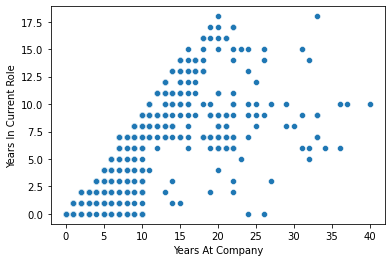

In [11]:
sns.scatterplot(x='YearsAtCompany',y='YearsInCurrentRole',data=df1_subset)
plt.xlabel('Years At Company')
plt.ylabel('Years In Current Role')
plt.show()

In this graph you see that Years At Company and Years in Current Role have a correlation.

# Predictive model
### For this assignment I choose the predictive model kNN.
The abbreviation kNN stands for k-Nearest Neighbours. It's a learning algorithm that's supervised. This implies that we will train it under close supervision. We use the labeled data that we already have to train it.

In [12]:
from sklearn.preprocessing import normalize

X = df1_subset[['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'Human Resources', 'Research & Development',
       'Sales', 'Human Resources', 'Research & Development', 'Sales',
       'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree', 'Human Resources', 'Research & Development',
       'Sales', 'Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree']]
X = normalize(X) 
y = df1_subset['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

First I have to distinguish test data from train data. That is what I did in the snippet above.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8276643990929705

83% of the attrition rate is predicted accurately.

This number is super high, the variables that I used to predict the attrion are: 'Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'. 

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=['Employed (actual)', 'Dismissed (actual)'], columns = ['Employed (pred)', 'Dismissed (pred)']) #label and make df
cm

,Employed (pred),Dismissed (pred)
Employed (actual),7,70
Dismissed (actual),6,358


In the snippet above you see a confusion matrix, which 

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.09      0.16        77
           1       0.84      0.98      0.90       364

    accuracy                           0.83       441
   macro avg       0.69      0.54      0.53       441
weighted avg       0.78      0.83      0.77       441



Dismissed (1): The precision for dismissed is very high with 84%, so 84% that are pressumed to not work at the company anymore are in fact not working there anymore. The recall for dismissed is even higher, with 98%. This means that only 2% of the cases are overlooked. 